# Explore here

In [1]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [30]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy.random import seed, choice
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from collections import Counter

In [3]:
# Your code here
df = pd.read_csv('../data/raw/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [5]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [6]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [7]:
df[df['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df[df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [9]:
#borramos las filas del grosor del pliegue cuatáneo, la insulina, la masa muscular,
# la presion arterial y la glucosa a= 0 porque son datos erróneos. 
df.drop(df[df['BMI'] == 0].index, inplace=True)
df.drop(df[df['BloodPressure'] == 0].index, inplace=True)
df.drop(df[df['Glucose'] == 0].index, inplace=True)
df.drop(df[df['SkinThickness'] == 0].index, inplace=True)
df.drop(df[df['Insulin'] == 0].index, inplace=True)

In [10]:
df.shape

(392, 9)

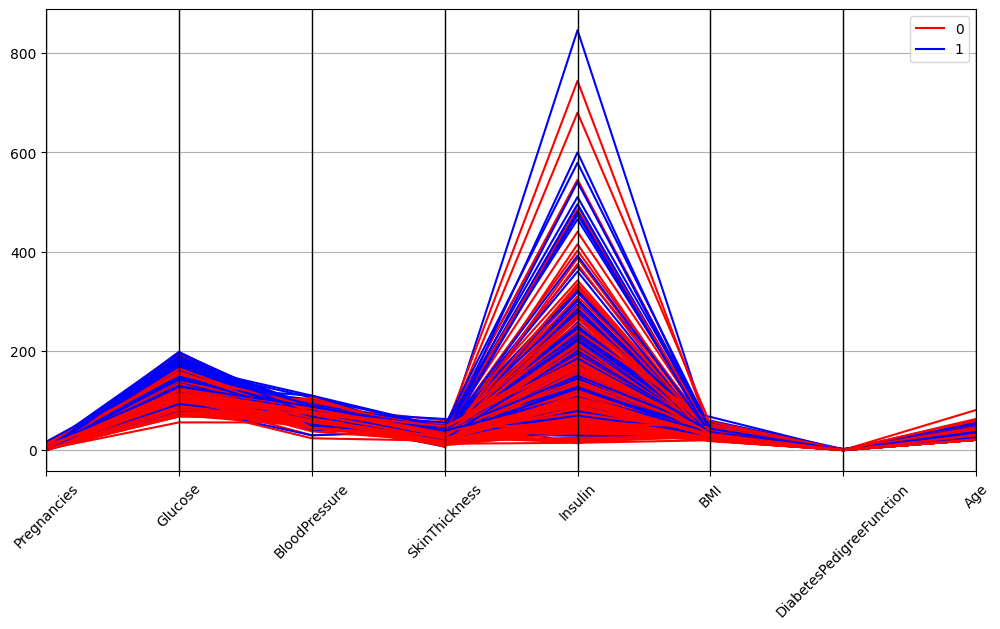

In [11]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [12]:
#hacemos prueba de test y train
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [13]:
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
simple_tree.fit(X_train, y_train)

complex_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=32)
complex_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=32)

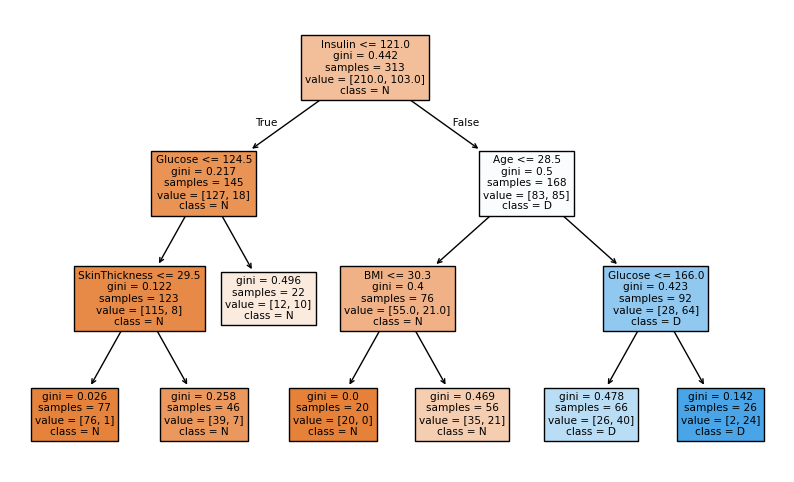

In [14]:
#vemos el arbol simple
plt.figure(figsize=(10, 6))
plot_tree(simple_tree,feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

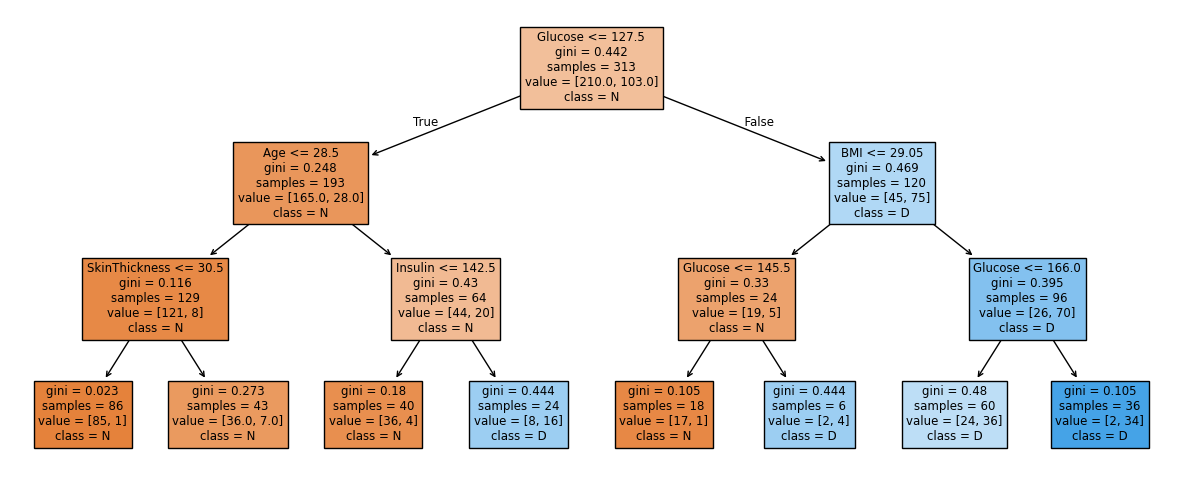

In [15]:
#vemos el arbol complejo
plt.figure(figsize=(15, 6))
plot_tree(complex_tree,feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

In [16]:
#caluclamos las metricas de entrenamiento y test y también sus diferencias 
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # creamos un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [17]:
#evaluamos el modelo simple y complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

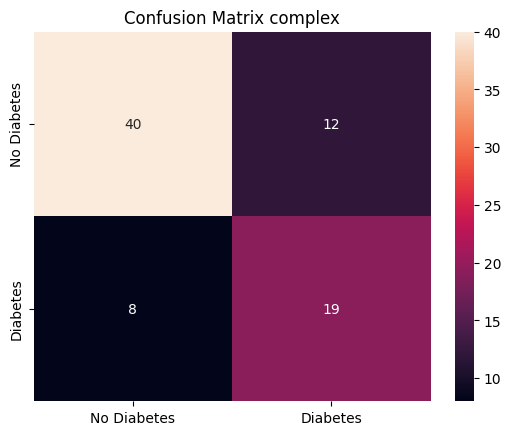

In [18]:
#MATRIZ DE CONFUSION DEL ARBOL COMPLEJO
cm_complex = confusion_matrix(y_test, test_pred_complex)
sns.heatmap(cm_complex,
            annot=True, 
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix complex')
plt.show()

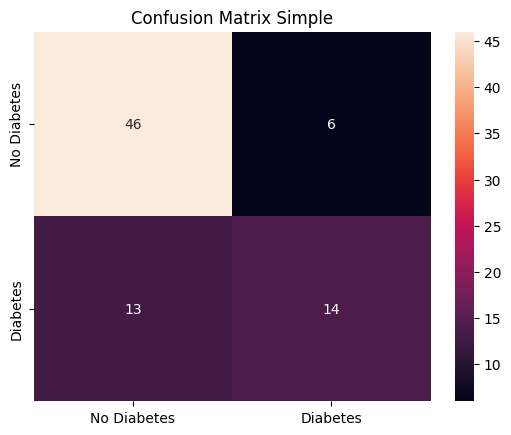

In [19]:
#vemos la confusion matrix del arbol simple 
cm_simple = confusion_matrix(y_test, test_pred_simple)
sns.heatmap(cm_simple,
            annot=True, 
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Simple')
plt.show()

In [20]:
#metricas del complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.843450,0.786026,0.851179,0.714286,0.873786,0.828571
Test,0.746835,0.655172,0.736467,0.612903,0.703704,0.769231
Diferencia,0.096615,0.130854,0.114712,0.101382,0.170083,0.059341


In [21]:
#metricas del simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.785942,0.656410,0.744013,0.695652,0.621359,0.866667
Test,0.759494,0.595745,0.701567,0.700000,0.518519,0.884615
Diferencia,0.026449,0.060666,0.042446,-0.004348,0.102841,-0.017949


Nos quedamos con el árbol complejo porque tiene mejor recall y así detecta más diabéticos.

In [22]:
# DEFINIMOS HIPERPARÁMETROS PARA EL MODELO OPTIMIZADO
tree = DecisionTreeClassifier(random_state=42)
param_grid = {
'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, 20, 50],
    'criterion': ['gini', 'entropy']
}

In [23]:
# Creamos un objeto GridSearchCV para encontrar la mejor combinación de hiperparámetros y lo ajustamos al modelo entrenamiento
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=1)

In [24]:
# Imprimimos los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
best_tree = grid_search.best_estimator_

Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [25]:
# Usamos el mejor modelo encontrado para predecir sobre el conjunto de entrenamiento, test y hacemos lasmetricas
train_pred_best = best_tree.predict(X_train)
test_pred_best = best_tree.predict(X_test)
get_metrics(y_train, y_test, train_pred_best, test_pred_best)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.843450,0.786026,0.851179,0.714286,0.873786,0.828571
Test,0.746835,0.655172,0.736467,0.612903,0.703704,0.769231
Diferencia,0.096615,0.130854,0.114712,0.101382,0.170083,0.059341


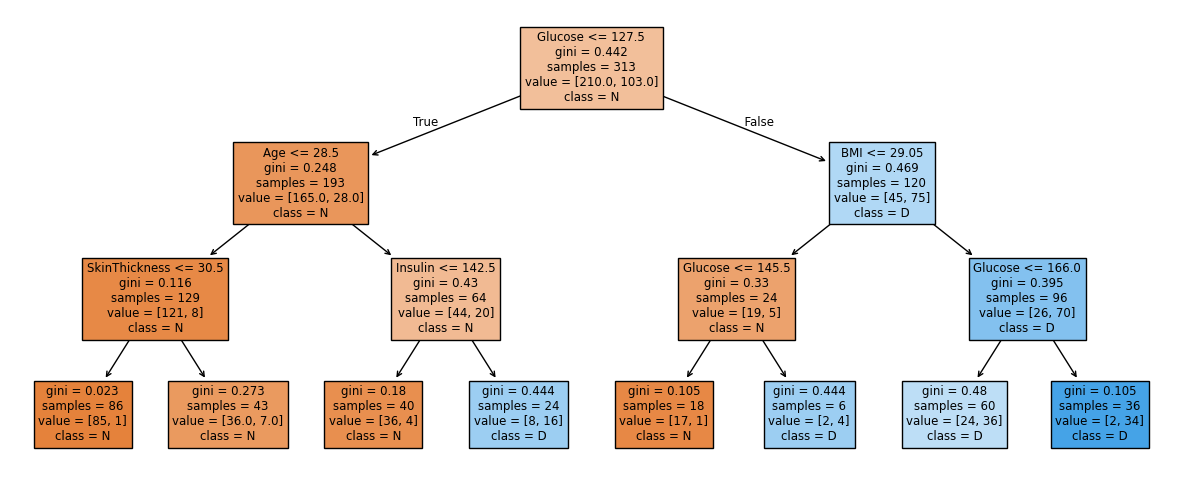

In [26]:
# Visualizamos el árbol de decisión optimizado
plt.figure(figsize=(15, 6))
plot_tree(best_tree, feature_names=X_train.columns, class_names=['N', 'D'], filled=True)
plt.show()

In [27]:
#hacemos las metricas para comparar los árboles
def comparar_modelos(y_train, y_test, pred_train_simple, pred_test_simple,
                     pred_train_complex, pred_test_complex,
                     pred_train_opt, pred_test_opt):
    
    modelos = ['Simple', 'Complejo', 'Optimizado']
    metricas = []

    for y_pred_train, y_pred_test in [
        (pred_train_simple, pred_test_simple),
        (pred_train_complex, pred_test_complex),
        (pred_train_opt, pred_test_opt)
    ]:
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc = roc_auc_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        specificity = confusion_matrix(y_test, y_pred_test)[0,0] / sum(confusion_matrix(y_test, y_pred_test)[0])
        
        metricas.append([
            train_accuracy,
            test_accuracy,
            f1,
            auc,
            precision,
            recall,
            specificity
        ])
    
    df_comparativa = pd.DataFrame(metricas, columns=[
        'Accuracy (Train)', 'Accuracy (Test)', 'F1 Score', 'AUC',
        'Precision', 'Recall', 'Specificity'
    ], index=modelos)
    
    return df_comparativa.round(4)

In [28]:
#hacemos la comparación
df_comparativa = comparar_modelos(
    y_train, y_test,
    train_pred_simple, test_pred_simple,
    train_pred_complex, test_pred_complex,
    train_pred_best, test_pred_best
)
print(df_comparativa)

            Accuracy (Train)  Accuracy (Test)  F1 Score     AUC  Precision  \
Simple                0.7859           0.7595    0.5957  0.7016     0.7000   
Complejo              0.8435           0.7468    0.6552  0.7365     0.6129   
Optimizado            0.8435           0.7468    0.6552  0.7365     0.6129   

            Recall  Specificity  
Simple      0.5185       0.8846  
Complejo    0.7037       0.7692  
Optimizado  0.7037       0.7692  


El arbol optimizado da los mismos resultados que el complejo

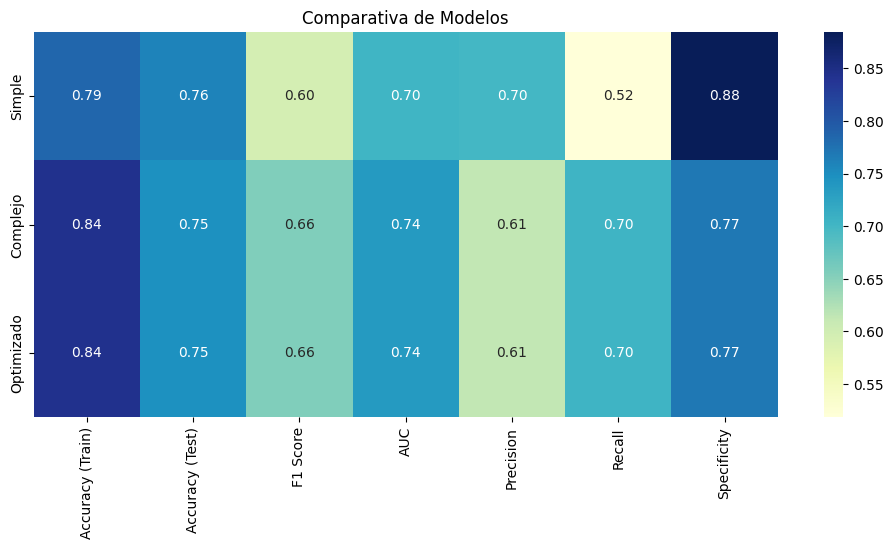

In [49]:
#la comparacion en mapa de calor
plt.figure(figsize=(12, 5))
sns.heatmap(df_comparativa, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Comparativa de Modelos")
plt.show()

El modelo complejo o optimizado es el mejor para predecir correctamento los casos de diabetes

# RANDOM FOREST

In [31]:
modelrandom = RandomForestClassifier(random_state= 42)
modelrandom.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
class RandomForestBootstrap: 
    def __init__(self, n_estimators, random_state, max_depth, min_samples_leaf, max_features, X, y):
        self.n_estimators= n_estimators #árboles que se van a generar
        self.random_state = random_state #semillas para asegurar reproducibilidad
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.X = X
        self.y = y
        self.estimators = [] #lista donde se guardan los modelos
    
    #aqui hacemos la selección aleatoria de las filas que entrenará cada árbol
    def get_bootstrap_datasets(self):
        seed(self.random_state)
        #fija la semilla para que el muestreo aleatorio sea reproducible
        idxs = [choice(len(self.X), len(self.X), replace=True) for _ in range(self.n_estimators)]
        #creamos un lista de índices de filas seleccionadas con reemplazo
        feature_idxs = [choice(self.X.shape[1], self.max_features, replace=False) for _ in range(self.n_estimators)]
        datasets = [
            (self.X.iloc[idxs[i], feature_idxs[i]], self.y.iloc[idxs[i]])
            for i in range(self.n_estimators)
        ]
        #para cada estimador, elegimos columnas sin reemplazo
        return feature_idxs, datasets
    
    def fit(self):
        feature_idxs, data_sets = self.get_bootstrap_datasets()
        #iteramos sobre los datasets y extraemos los datos X, y
        # i sirve para saber qué conjunto usar 
        #data contiene X_bootstrap e y_bootstrap
        for i, data in enumerate(data_sets):
            X, y = data
            #entrenamos el decissiontreeclasifier de X, y con los hiperparametros
            arbol = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf, max_features=self.max_features, random_state=self.random_state).fit(X, y)
            #entrenamos un árbol de decisión con los parámetros y los datos bootstrap
            self.estimators.append((feature_idxs[i], arbol))
    #realizamos predicciones sobre un nuevo conjunto de datos combinando las predicciones de todos los árboles.
    def predict(self, X):
        predictions = np.vstack([arbol.predict(X.iloc[:, idxs]) for idxs, arbol in self.estimators])
        predicciones = [Counter(predictions[:, i]).most_common(1)[0][0] for i in range(predictions.shape[1])]
        return predicciones

In [33]:
#creamos y entrenamos los modelos simples y complejos 
rf_simple = RandomForestBootstrap(n_estimators=3, random_state=42, max_depth=33, min_samples_leaf=30, max_features= X_train.shape[1]//2, X=X_train, y=y_train)
rf_simple.fit()
rf_complex = RandomForestBootstrap(n_estimators=100, max_depth=20, min_samples_leaf=1, max_features=int(X_train.shape[1]*0.8), random_state=42, X=X_train, y=y_train)
rf_complex.fit()

In [34]:
#HACEMOS LAS PREDICCIONES DE XTRAIN Y X TEST DEL SIMPLE Y EL COMPLEJO
rf_train_pred_simple = rf_simple.predict(X_train)
rf_test_pred_simple = rf_simple.predict(X_test)
rf_train_pred_complex = rf_complex.predict(X_train)
rf_test_pred_complex = rf_complex.predict(X_test)

In [ ]:
#métricas del random forest simple
get_metrics(y_train, y_test, rf_train_pred_simple, rf_test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.817891,0.716418,0.787610,0.734694,0.699029,0.876190
Test,0.721519,0.560000,0.672721,0.608696,0.518519,0.826923
Diferencia,0.096372,0.156418,0.114889,0.125998,0.180511,0.049267


In [36]:
#métricas del random forest complejo
get_metrics(y_train, y_test, rf_train_pred_complex, rf_test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.746835,0.583333,0.691952,0.666667,0.518519,0.865385
Diferencia,0.253165,0.416667,0.308048,0.333333,0.481481,0.134615


In [37]:
#buscamos los mejores hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5]
}
# Crear el modelo y la búsqueda
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Mejores parámetros:", grid_search_rf.best_params_)

Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50}


In [38]:
# Modelo con los mejores parámetros
best_rf = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',  
    min_samples_leaf=5,   
    n_estimators=100, 
    random_state=42
)
# Entrenamiento
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [39]:
# Predicciones
y_train_pred_best = best_rf.predict(X_train)
y_test_pred_best = best_rf.predict(X_test)
metrics_best = get_metrics(y_train, y_test, y_train_pred_best, y_test_pred_best)
metrics_best

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.907348,0.848168,0.876537,0.920455,0.786408,0.966667
Test,0.734177,0.553191,0.673433,0.650000,0.481481,0.865385
Diferencia,0.173171,0.294976,0.203104,0.270455,0.304926,0.101282


In [40]:
#DEFINIMOS  VARIABLES PARA COMPARAR LOS TRES MODELOS
def comparar_rf_modelos(y_train, y_test,
                        rf_train_pred_simple, rf_test_pred_simple,
                        rf_train_pred_complex, rf_test_pred_complex,
                        rf_train_pred_best, rf_test_pred_best):
    
    modelos = ['RF Simple', 'RF Complejo', 'RF Optimizado']
    metricas = []

    for y_pred_train, y_pred_test in [
        (rf_train_pred_simple, rf_test_pred_simple),
        (rf_train_pred_complex, rf_test_pred_complex),
        (rf_train_pred_best, rf_test_pred_best)
    ]:
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        auc = roc_auc_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        specificity = confusion_matrix(y_test, y_pred_test)[0, 0] / sum(confusion_matrix(y_test, y_pred_test)[0])
        
        metricas.append([
            train_accuracy,
            test_accuracy,
            f1,
            auc,
            precision,
            recall,
            specificity
        ])
    
    df_comparativa = pd.DataFrame(metricas, columns=[
        'Accuracy (Train)', 'Accuracy (Test)', 'F1 Score', 'AUC',
        'Precision', 'Recall', 'Specificity'
    ], index=modelos)
    
    return df_comparativa.round(4)

In [46]:
#COMPARAMOS LOS TRES MODELOS 
df_rf_comparativa = comparar_rf_modelos(
    y_train, y_test,
    rf_train_pred_simple, rf_test_pred_simple,
    rf_train_pred_complex, rf_test_pred_complex,
    y_train_pred_best, y_test_pred_best
)
print(df_rf_comparativa)

               Accuracy (Train)  Accuracy (Test)  F1 Score     AUC  Precision  \
RF Simple                0.8179           0.7215    0.5600  0.6727     0.6087   
RF Complejo              1.0000           0.7468    0.5833  0.6920     0.6667   
RF Optimizado            0.9073           0.7342    0.5532  0.6734     0.6500   

               Recall  Specificity  
RF Simple      0.5185       0.8269  
RF Complejo    0.5185       0.8654  
RF Optimizado  0.4815       0.8654  


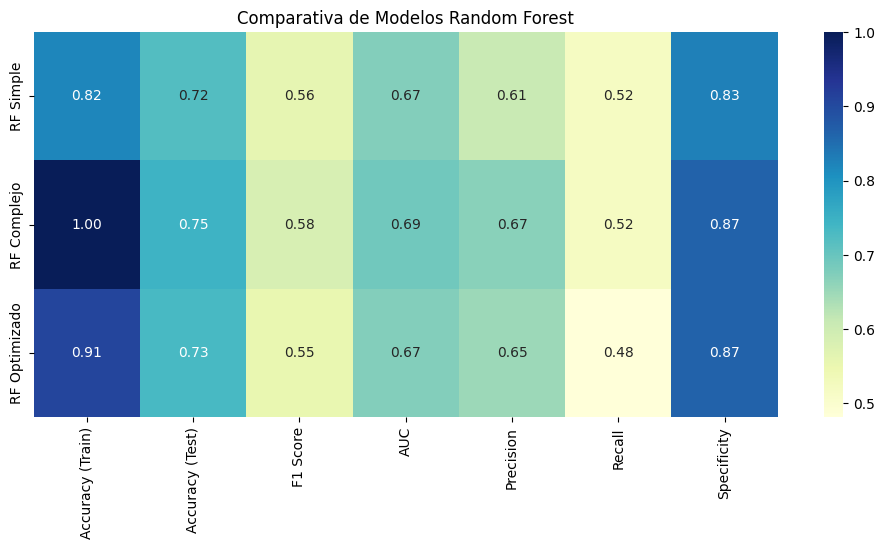

In [48]:
plt.figure(figsize=(12, 5))
sns.heatmap(df_rf_comparativa, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Comparativa de Modelos Random Forest")
plt.show()

Aunque claramente el complejo tiene mejores valores que el simple y el optimizado, tiene una ccurazy de 1, así que eso significa que tiene overfitting. Por eso nos quedamos ocn el optimizado porque tiene mejor rendimiento y evita el overfitting

In [ ]:
#observamos las importancias del mejor random forest
importances = best_rf.feature_importances_
features = X_train.columns
feature_importances = {feat: imp for feat, imp in zip(features, importances)}
feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
feature_importances

{'Glucose': np.float64(0.33428353482827666),
 'Insulin': np.float64(0.16357719821077357),
 'Age': np.float64(0.12138624343281654),
 'BMI': np.float64(0.11046186263156679),
 'Pregnancies': np.float64(0.07891351135317606),
 'DiabetesPedigreeFunction': np.float64(0.07280612978790282),
 'SkinThickness': np.float64(0.06064917680147641),
 'BloodPressure': np.float64(0.057922342954011226)}

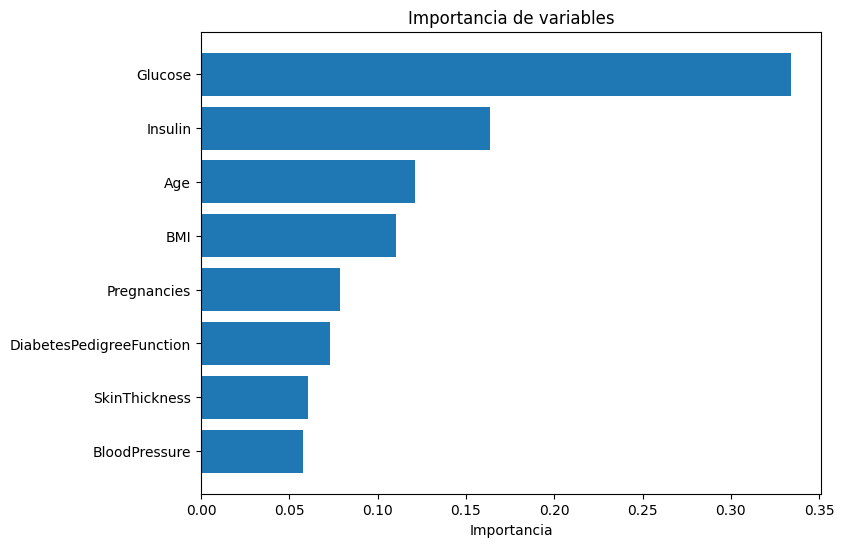

In [43]:
#graficamos las importancias 
plt.figure(figsize=(8,6))
plt.barh(list(feature_importances.keys()), list(feature_importances.values()))
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de variables')
plt.show()

El mejor modelo indica que la glucosa es la variable más importante con un 33%, seguido de la insulina, la edad y el BMI, son los factores calve en la predicción d ela diabetes. 